In [1]:
# Use autoreload extension so agent definition is always up to date.
# Src: https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

import os
import time
from collections import deque

import numpy as np
import seaborn as sns
import torch
from matplotlib import pyplot as plt
from unityagents import UnityEnvironment

import BananaAgent as Agents
import wandb

sns.set_style()


In [2]:
# TODO: Check if Banana is available
# Load environment and get initial brain
env = UnityEnvironment("Banana/Banana.x86_64", no_graphics=True)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# Initialize environment for use of the agent
env_info = env.reset(train_mode=True)[brain_name]
action_space = brain.vector_action_space_size
state_space = env_info.vector_observations.size

print(f"Action space: {action_space}")
print(f"State space: {state_space}")


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Action space: 4
State space: 37


In [3]:
def do_episode(environment, agent):
    """Performs a single episode using the given environment and agent

    Args:
        environment (env): Environment that will perform the simulation
        agent (Agent): Agent that will traverse the environment

    Returns:
        (float, int): Total score and steps of the episode
    """
    episode_score = 0
    env_info = env.reset(train_mode=True)[brain_name]

    # Start the agent
    state = env_info.vector_observations[0]
    next_action = agent.start(state)

    # Take the first action
    env_info = env.step(next_action)[brain_name]

    while not env_info.local_done[0]:
        # Take a step from the agent
        reward = env_info.rewards[0]
        episode_score += reward
        state = env_info.vector_observations[0]

        next_action = agent.step(reward, state)

        # Perform action
        env_info = env.step(next_action)[brain_name]
    
    # Register last reward to the agent
    reward = env_info.rewards[0]
    episode_score += reward
    agent.end(reward)

    return episode_score


def create_agent(state_space, action_space, **kwargs):
    """Create the list of agents to test

    Returns:
        list: List of agents
    """
    agent = kwargs.get('agent')
    if agent == 'DQN':
        return Agents.BananaAgent(state_space, action_space, **kwargs)
    elif agent == 'DoubleDQN':
        return Agents.BananaAgentDouble(state_space, action_space, **kwargs)
    else:
        print(f"No agent named: {agent}")
        return None


    
def do_experiment(environment, agent, episodes, print_every):
    """Performs an experiment on the given agent.

    Args:
        environment (any): Environment to use
        agent (Agent): Agent that follows the "Agent" interface
        episodes (int): Amount of episodes to perform
        print_every (int): How often to print the episode information

    Returns:
        (array_like, array_like): Scores and times that the agent took per episode
    """
    scores = np.zeros(episodes)
    times = np.zeros(episodes)

    for i in range(episodes):
        start_time = time.time()
        scores[i] = do_episode(environment, agent)
        times[i] = time.time() - start_time

        # Log data
        ep = i+1
        wandb.log({
            "episode": ep,
            "score": scores[i],
            "time": times[i]
        })
        
        if ep % print_every == 0:
            print(f"{agent.agent_name()} :: ({ep}/{episodes}) AVG {np.average(scores[max(0, i-print_every):])}")
    
    return scores, times

wandb: Wandb version 0.12.21 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
INFO:wandb.run_manager:system metrics and metadata threads started
INFO:wandb.run_manager:checking resume status, waiting at most 10 seconds
INFO:wandb.run_manager:resuming run from id: UnVuOnYxOjNnaDduOWp4Om5hbm9ybC1wMTpqb3JlbG1i
INFO:wandb.run_manager:upserting run before process can begin, waiting at most 10 seconds
INFO:wandb.run_manager:saving pip packages
INFO:wandb.run_manager:initializing streaming files api
INFO:wandb.run_manager:unblocking file change observer, beginning sync with W&B servers
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/config.yaml
INFO:wandb.run_manager:file/dir created: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-metadata.json
INFO:wandb.run_manager:file/dir created: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/requirements.txt
INFO:wandb.run_manager:file/dir created

BananaAgentDouble :: (400/2000) AVG 0.074


INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /h

BananaAgentDouble :: (800/2000) AVG 0.9962523422860712


INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /h

BananaAgentDouble :: (1200/2000) AVG 2.1132389675270606


INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /h

BananaAgentDouble :: (1600/2000) AVG 3.9962546816479403


INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /h

BananaAgentDouble :: (2000/2000) AVG 8.840399002493765


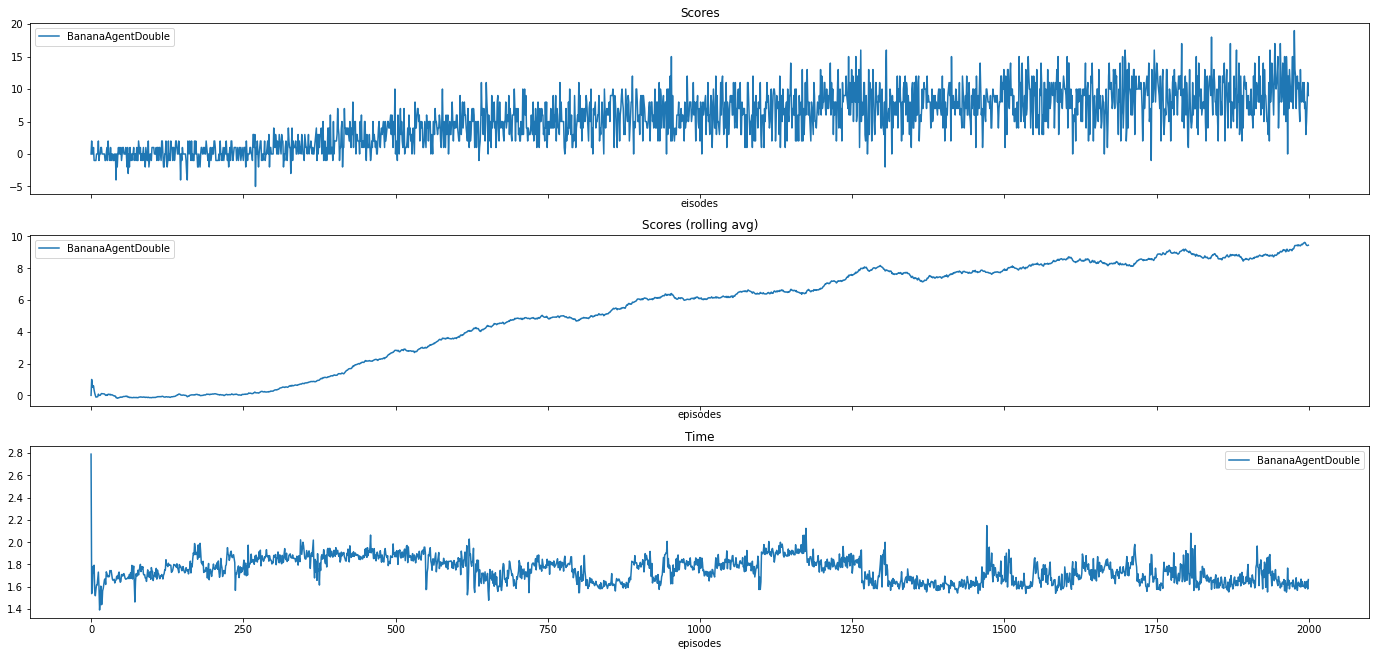

INFO:wandb.run_manager:shutting down system stats and metadata service
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-events.jsonl
INFO:wandb.run_manager:stopping streaming files and file change observer
INFO:wandb.run_manager:file/dir modified: /home/jorge/nano-rl-p1/wandb/run-20220727_140712-3gh7n9jx/wandb-metadata.json


In [4]:

# Perform each episode of the training
figure, axis = plt.subplots(3, 1, figsize=(19, 9), constrained_layout=True, sharex="all")
axis[0].set_title("Scores")
axis[0].set_xlabel("eisodes")
axis[1].set_title("Scores (rolling avg)")
axis[1].set_xlabel("episodes")
axis[2].set_title("Time")
axis[2].set_xlabel("episodes")

with wandb.init(project='nanorl-p1') as run:
    average_window = wandb.config.avg_window
    episodes = wandb.config.episodes
    print_every = 400

    agent = create_agent(state_space, action_space, **wandb.config)
    # Do experiment
    scores, times = do_experiment(env, agent, episodes, print_every)
    agent_name = agent.agent_name()

    # Save agent
    torch.save(agent, f"agents/{agent_name}-{run.id}.pt")

    # Plot the statistics
    x = np.arange(episodes)
    sns.lineplot(x=x, y=scores, label=agent_name, ax=axis[0])

    avg = [np.average(scores[max(0, n-average_window):n+1]) for n in range(episodes)]
    sns.lineplot(x=x, y=avg, label=agent_name, ax=axis[1])

    sns.lineplot(x=x, y=times, label=agent_name, ax=axis[2])

plt.show()

    


In [5]:
# Close environment
env.close()